In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import Constants as C
from PlotTool import PlotTool
from Loader import Loader
from Cuts import qlayerCut, qratio, maxDistMaxDoms
from Cuts import balloonChargeRatio, balloonCut

import matplotlib.pyplot as plt

#savedir = '../plots/cutsana/'
#savedir = '../plots/mvaana/'
#savedir = '../plots/mvaana_recleanedpulses_latestdir/'
#savedir = '../plots/mvaana_vhecorsika/'
#savedir = '../plots/mvaana_ballooncuts/'
#savedir = '../plots/mvaana_ballooncuts_srtdustlayeroff/'
savedir = '../plots/mvaana_ballooncuts_srtdustlayeroff_ndoms5pecut/'

In [8]:
# Load the data here
loader = Loader(C.basesel+'&&(ImpLF_rchi2 > 80)')

dt_data = loader.getData()
dt_cor  = loader.getCorsika()
dt_nue  = loader.getNuE()
dt_numu = loader.getNuMu()

In [9]:
# insert the qratio into the frame
def addqratio(data):
    data['qratio'] = pd.Series( qratio(data), index=data.index)
    return data

dt_data = addqratio(dt_data)
dt_cor  = addqratio(dt_cor)
dt_nue  = addqratio(dt_nue)
dt_numu = addqratio(dt_numu)

In [10]:
# Add the maximum distance to the data frame as well

dt_data['maxDist'] = maxDistMaxDoms(dt_data)
dt_nue['maxDist']  = maxDistMaxDoms(dt_nue)
dt_numu['maxDist'] = maxDistMaxDoms(dt_numu)
dt_cor['maxDist']  = maxDistMaxDoms(dt_cor)

In [11]:
# Add the balloon charge ratio 

dt_data['bQRat'] = balloonChargeRatio(dt_data)
dt_nue['bQRat'] = balloonChargeRatio(dt_nue)
dt_numu['bQRat'] = balloonChargeRatio(dt_numu)
dt_cor['bQRat'] = balloonChargeRatio(dt_cor)

In [12]:
# Now that the data is loaded, put everything into an info object
dt_mc = pd.concat([dt_cor, dt_nue, dt_numu])
#dt_mc = pd.concat([dt_cor, dt_nue])

def getinfo(data, mctot, cor, nue, numu):

    return {'data' : [data, mctot, cor, nue, numu, 
                      nue, numu],
            'names'    : ['Data',
                          'Total Bkg.', 
                          r'Atmos. $\mu$',
                          r'Atmos. $\nu_{e}$', 
                          r'Atmos. $\nu_{\mu}$',
                          r'Astro. $\nu_{e}$',
                          r'Astro. $\nu_{\mu}$'
                         ],
            'weights' : ['w','w','w',
                         'w','w', 
                         'wE2', 'wE2'
                        ], 
            'colors'  : ['black', 'r', 'm', 'g', 
                         'b', 'y', 'c'
                        ],
            'lw'      : [0, 1.5, 1.5, 1.5, 1.5,1.5,1.5],
            'ls'      : ['solid','dashed','solid','solid','solid','solid','solid'],
            'marker'  : ['.',' ', ' ', ' ', ' ',' ',' ']
    }
    
info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)

In [13]:
# Print the rates quickly
def prates(info, cut):
    print cut
    for i in range(len(info['data'])):
        dt = info['data'][i]
        name = info['names'][i]
        w = info['weights'][i]
        
        print name, sum(dt[w]) / C.livetime

prates(info,'baseline')

# apply balloon cut
dt_data = balloonCut(dt_data)
dt_mc   = balloonCut(dt_mc)
dt_cor  = balloonCut(dt_cor)
dt_nue  = balloonCut(dt_nue)
dt_numu = balloonCut(dt_numu)
info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)
prates(info, 'balloon cut')

# apply qratio cut
dt_data = qlayerCut(dt_data,False,0.8)
dt_mc = qlayerCut(dt_mc,False,0.8)
dt_cor = qlayerCut(dt_cor,False,0.8)
dt_nue = qlayerCut(dt_nue,False,0.8)
dt_numu = qlayerCut(dt_numu,False,0.8)
info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)
prates(info, 'qlayer cut')

# timing cut
def tcut(dt):
    return dt[ dt['tlarge5[0]-tearly5[0]'] < 200 ]
dt_data = tcut(dt_data)
dt_mc = tcut(dt_mc)
dt_cor = tcut(dt_cor)
dt_nue = tcut(dt_nue)
dt_numu = tcut(dt_numu)
info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)
prates(info, 'qlayer cut')


baseline
Data 0.134996731241
Total Bkg. 0.132349612821
Atmos. $\mu$ 0.132342632412
Atmos. $\nu_{e}$ 8.43572441009e-07
Atmos. $\nu_{\mu}$ 6.13683698289e-06
Astro. $\nu_{e}$ 6.96103753985e-07
Astro. $\nu_{\mu}$ 6.938279287e-07
balloon cut
Data 0.125643078237
Total Bkg. 0.125472680223
Atmos. $\mu$ 0.125466010169
Atmos. $\nu_{e}$ 8.18742118602e-07
Atmos. $\nu_{\mu}$ 5.85131238472e-06
Astro. $\nu_{e}$ 6.88908166444e-07
Astro. $\nu_{\mu}$ 6.83475541279e-07
qlayer cut
Data 0.0525132751628
Total Bkg. 0.0544744530013
Atmos. $\mu$ 0.054471089981
Atmos. $\nu_{e}$ 4.55481522423e-07
Atmos. $\nu_{\mu}$ 2.90753884734e-06
Astro. $\nu_{e}$ 4.65032664586e-07
Astro. $\nu_{\mu}$ 4.34005863581e-07
qlayer cut
Data 0.0119072873306
Total Bkg. 0.0129504480598
Atmos. $\mu$ 0.0129476111077
Atmos. $\nu_{e}$ 4.50415294888e-07
Atmos. $\nu_{\mu}$ 2.38653683516e-06
Astro. $\nu_{e}$ 4.57404118894e-07
Astro. $\nu_{\mu}$ 2.7487557286e-07


In [7]:
# Initialize the plot tool
p_tool = PlotTool()

# Now drop in some stacked plots that we want to understand
variables = {'hs_z_travel' : [50,-500,500, 'ztravel','z-travel [m]'],
             'rho_travel'  : [50, 0, 1000, 'rhotravel', r'$\rho$-travel [m]'],
             'log10(hs_q_tot_pulses)' : [40, 3, 7, 'logqtot','log10(NPE)'],
             'log10(NPE)'     : [40, 3, 7, 'lognpe','log10(NPE) (portia)'],
             'qratio'         : [100,0,1,'qratio','qratio'],
             'hm_nhit_doms'   : [50,0,1500, 'hitdoms', r'N Hit Doms'],
             'hm_nhit_strings': [60,0,60,'hitstrings','N Hit Strings'],
             'Nch'            : [50,0,1500, 'Nch', 'N Channel (portia)'],
             'tlarge5[0]-tearly5[0]'  : [100, 0, 10000, 'tEarlyMinusLarge', 'tlarge-tearly'],
             'cumuAt600ns' : [25,0,1,'cumuAt600ns','Cumulative @ 600ns'],
             #'widthAt50' : [50,0,2000,'widthAt50','Width @ 50%'],
             #'widthAt70' : [50,0,2000,'widthAt70','Width @ 70%'],
             'maxDist' : [25,0,1000,'maxDist','Max Dist 3 Largest Charge DOms'],
             'ImpLF_rchi2' : [50,0,500,'rchi2',r'Reduced $\chi^{2}$'],
             'hs_cogz' : [50,-500,500,'cog_z','COG z [m]'],
             'sqrt(hs_cogx*hs_cogx+hs_cogy*hs_cogy)' : [30,0,600,'cog_rho',r'COG $\rho$'],
             'bQRat' : [50,1,25,'balloonQRatio_zoom',r'NPE$^{tot}$ / NPE$^{MaxDom}$ (zoomed)'],
             'rho_travel5' : [50,0,1000,'rhotravel5pe',r'$\rho$-travel (> 5 p.e.) [m]'],
             'ndoms_5pe' : [50,0,500,'hitdoms5pe','N Hit Doms (> 5 p.e.)'],
             #'nstrings_5pe' : [60,0,60,'hitstrings5pe','N Hit Strings (> 5 p.e.)'],
             'nstr_2ndway_5pe' : [60,0,60,'nstr_2ndway_5pe','N Hit Strings (> 5 p.e.)']
            }



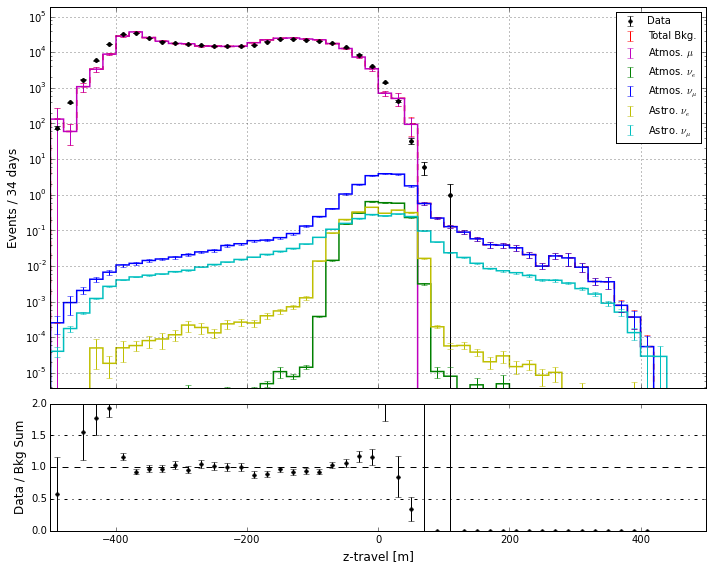

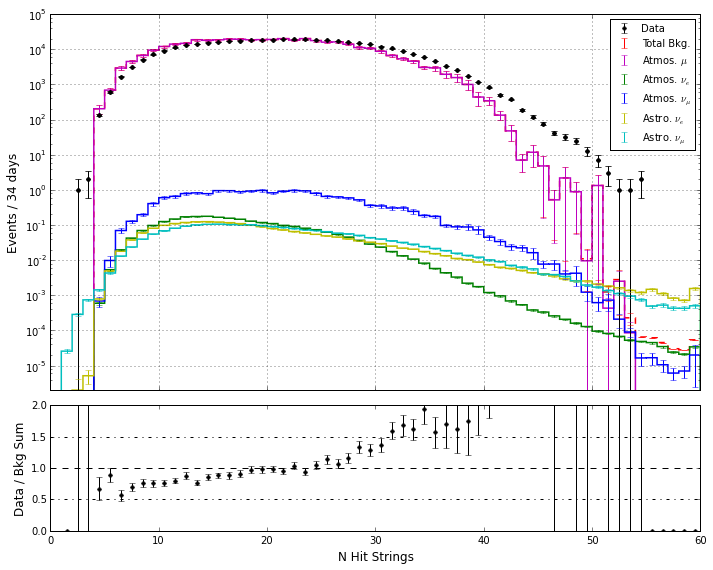

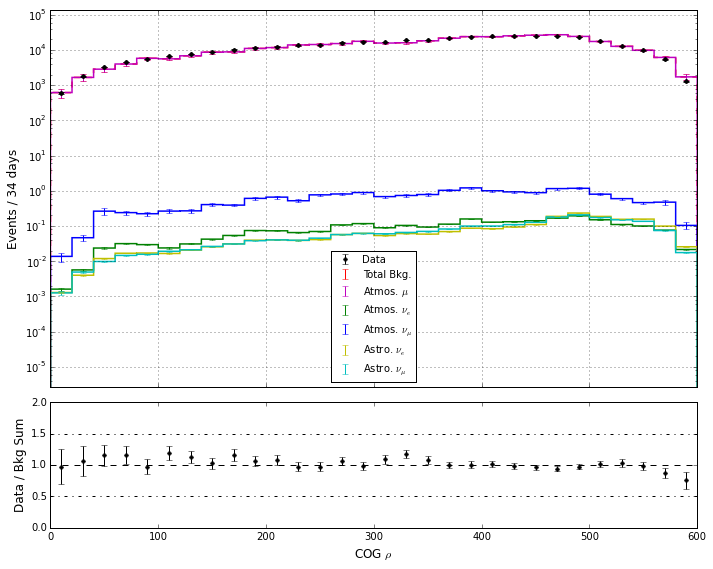

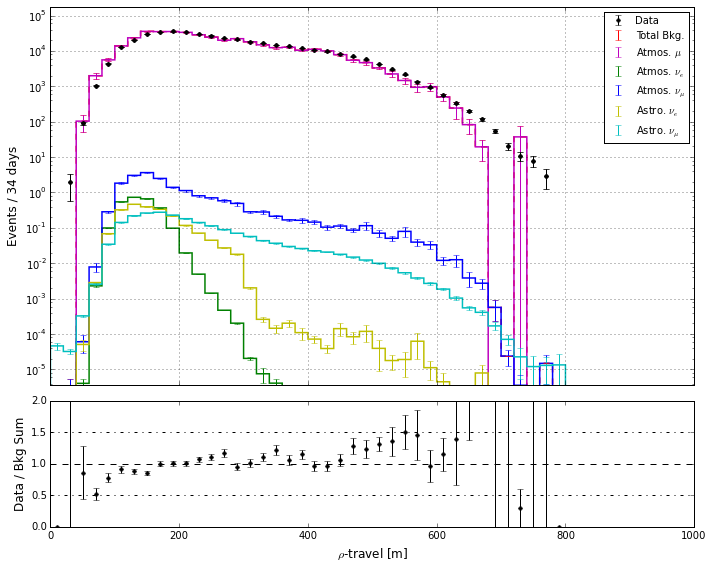

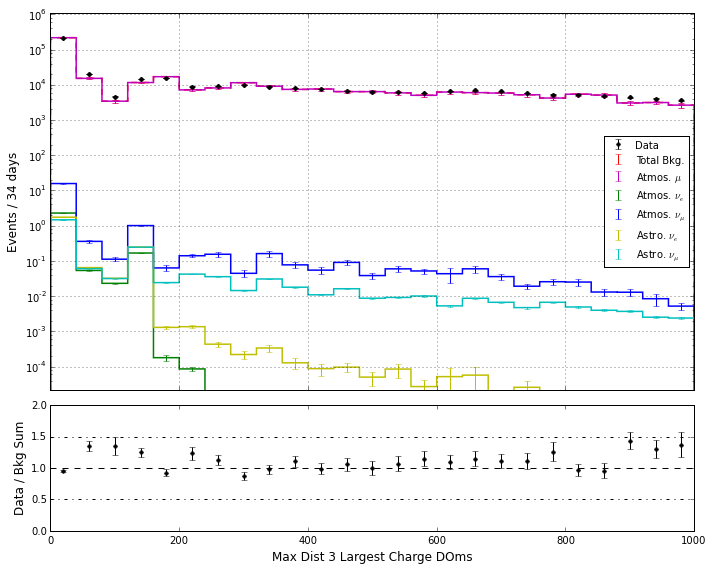

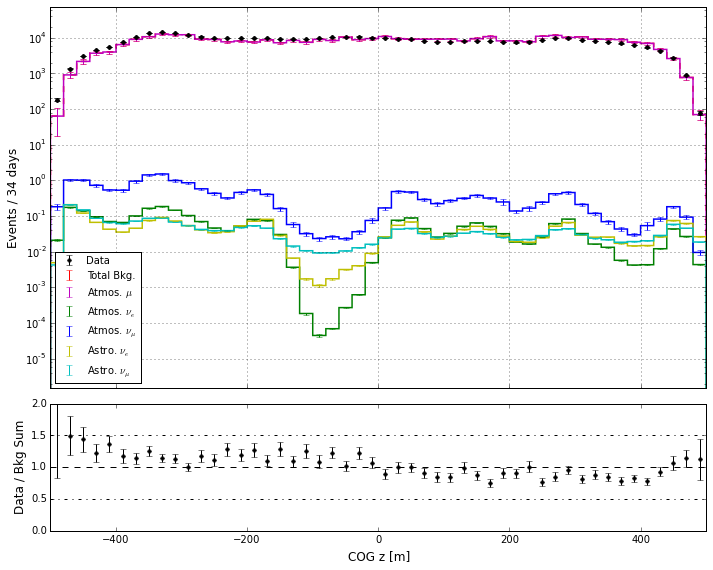

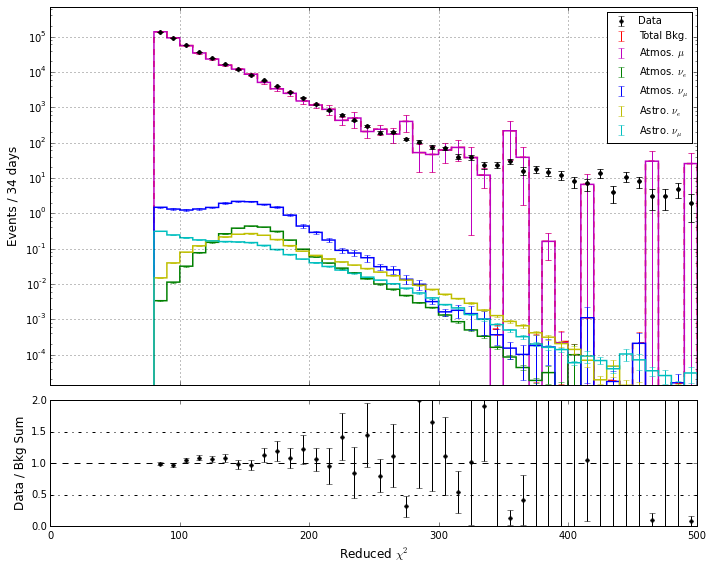

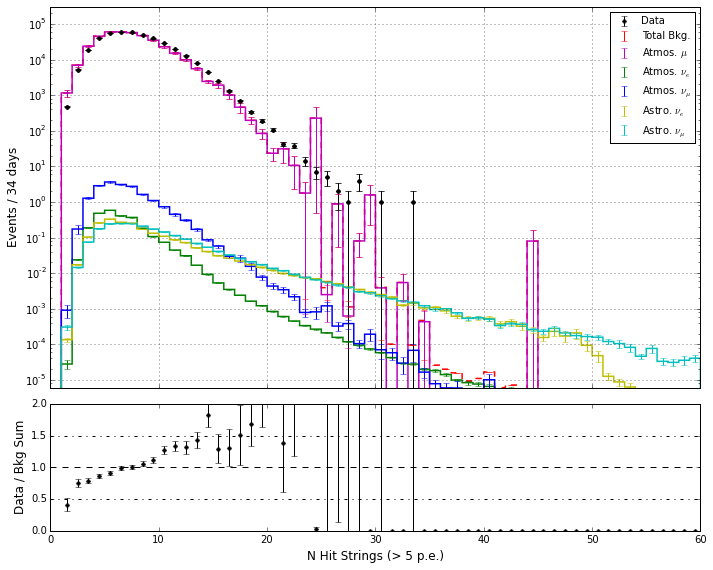

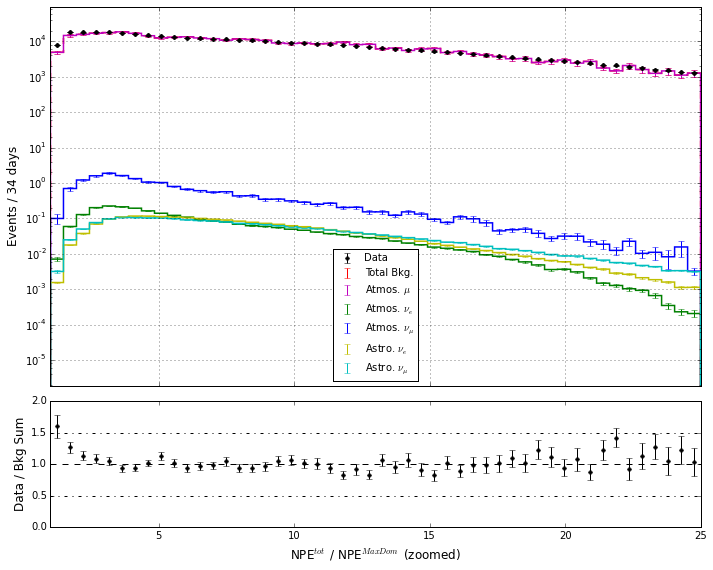

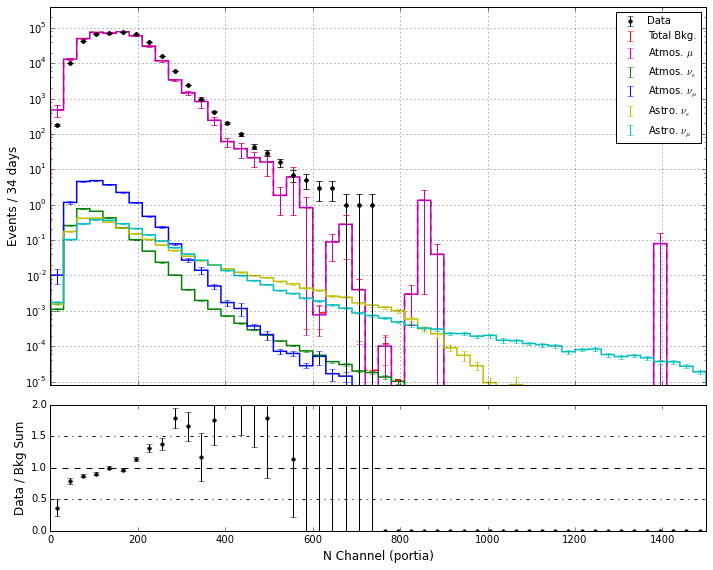

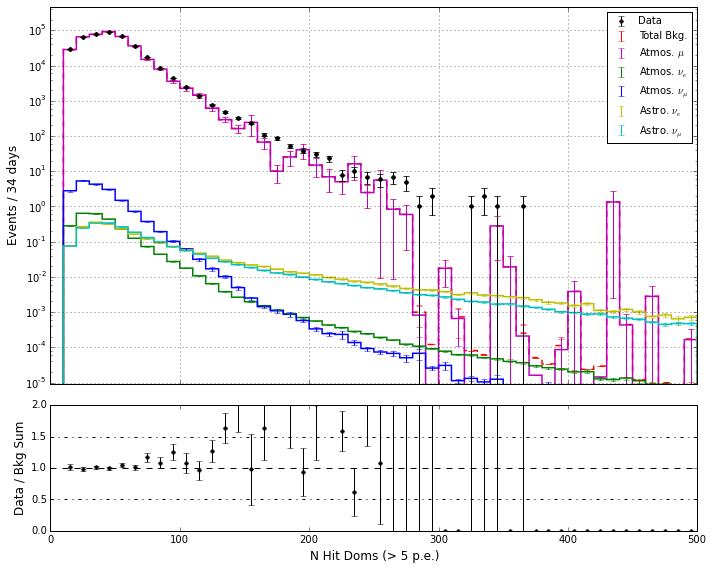

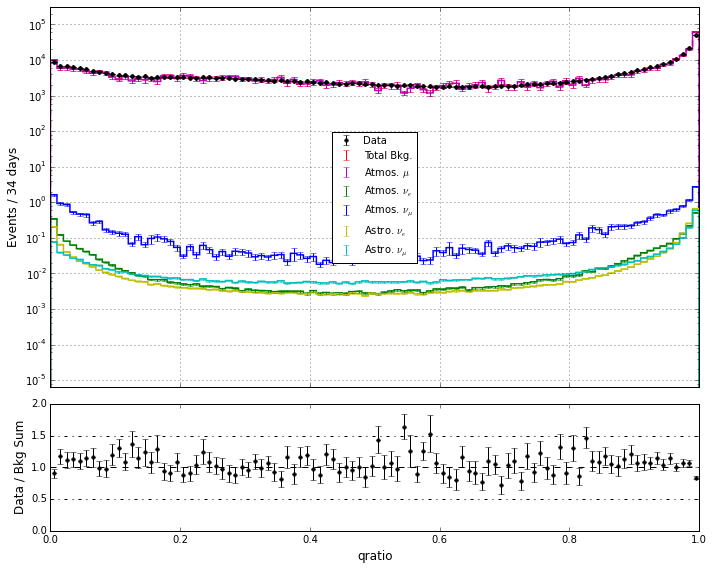

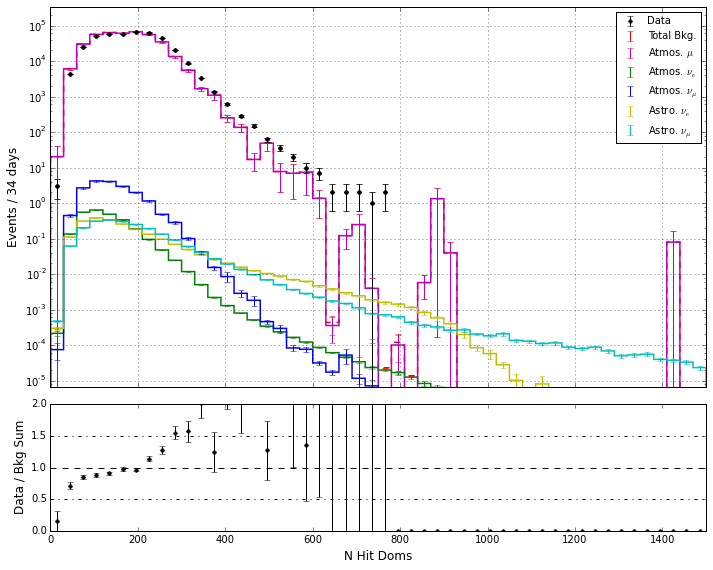

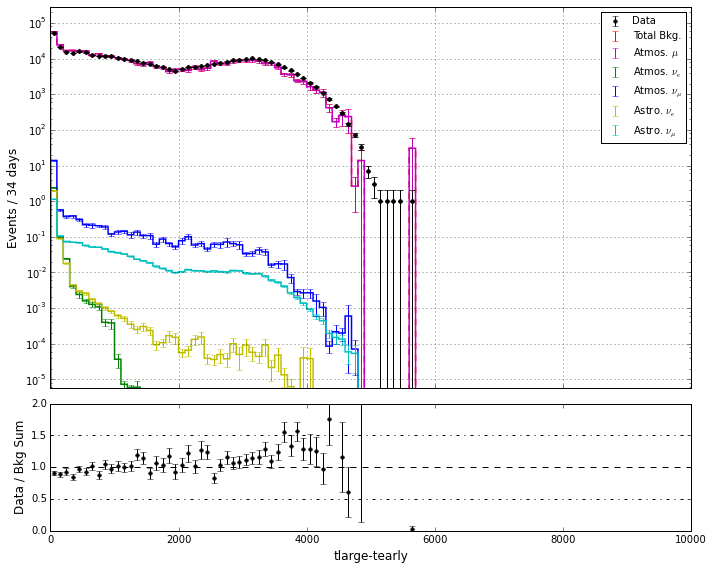

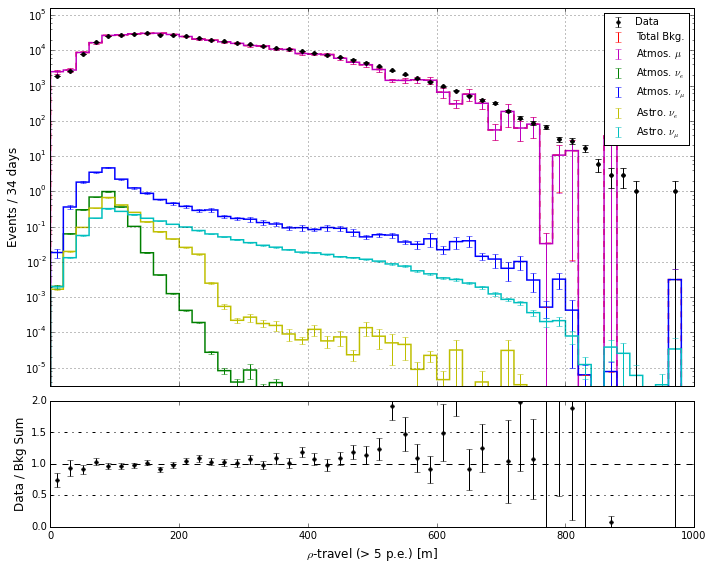

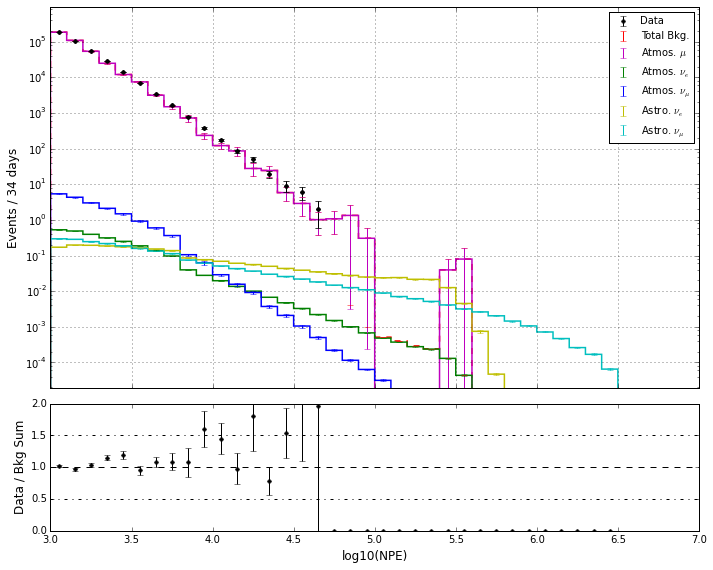

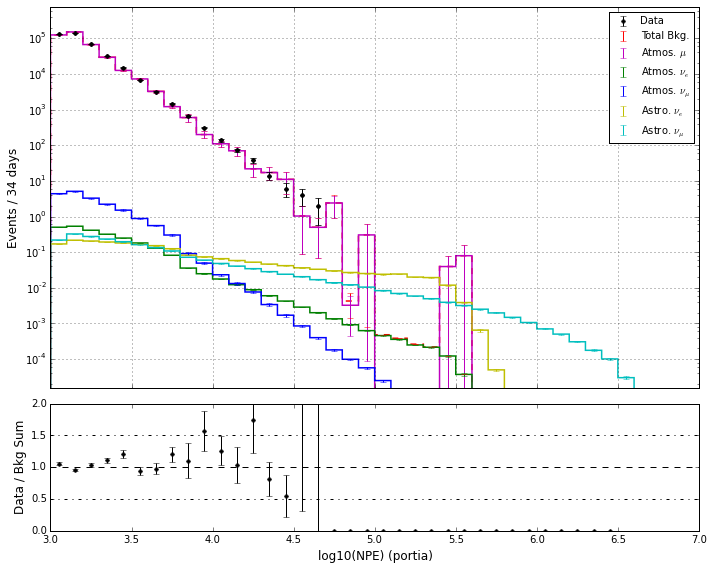

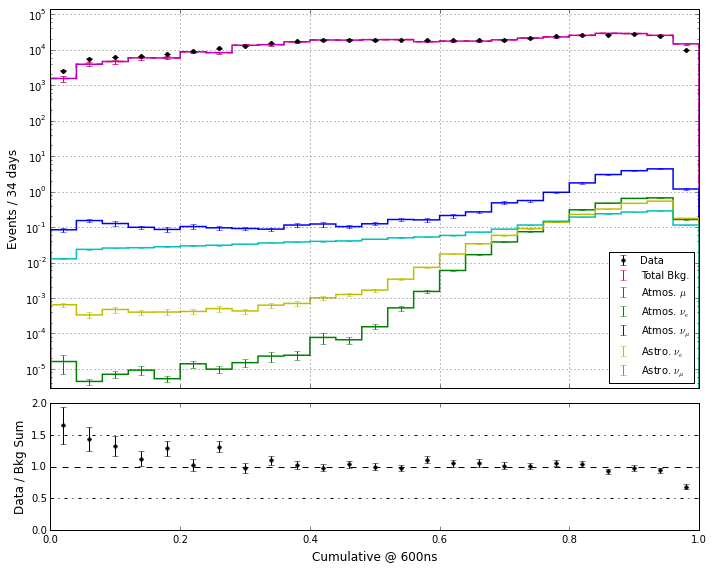

In [8]:
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    
    plt.savefig(savedir+'baseline/'+lims[3]+'.png')

In [9]:
# Place the balloon event cut
def bcut(d,cval):
    return d[ d['bQRat'] > cval]

bcutval = 2
dt_data = bcut(dt_data,bcutval)
dt_numu = bcut(dt_numu,bcutval)
dt_nue = bcut(dt_nue,bcutval)
dt_cor = bcut(dt_cor,bcutval)
dt_mc = bcut(dt_mc,bcutval)

info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)


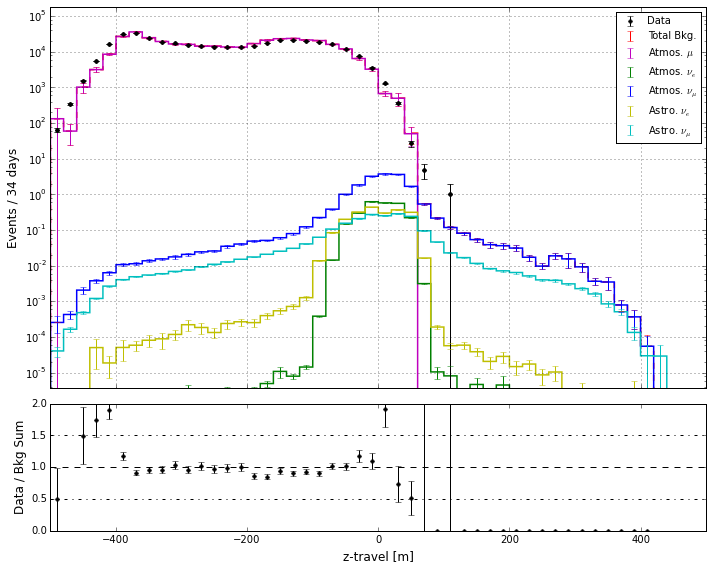

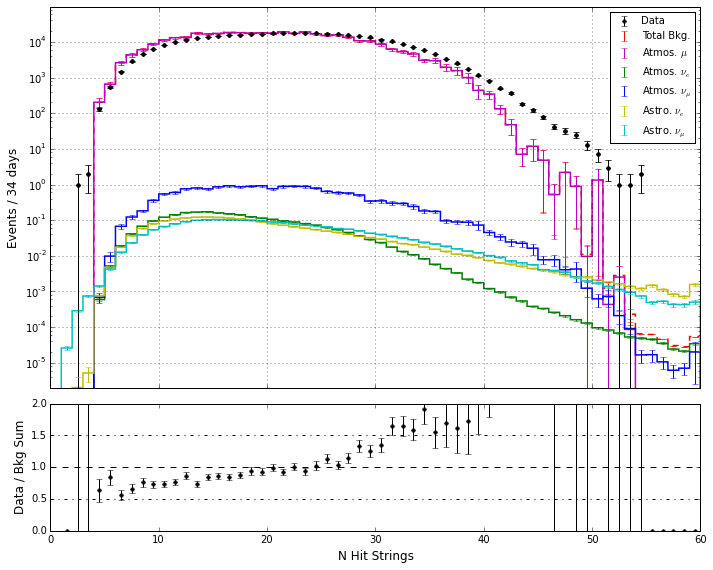

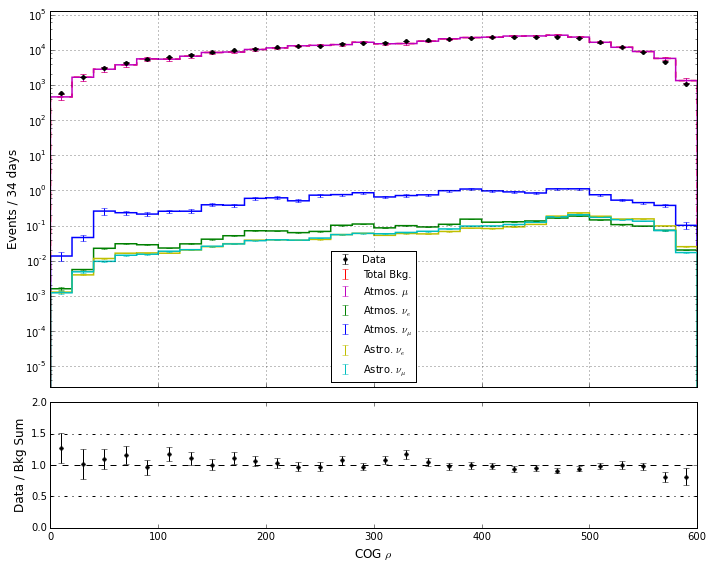

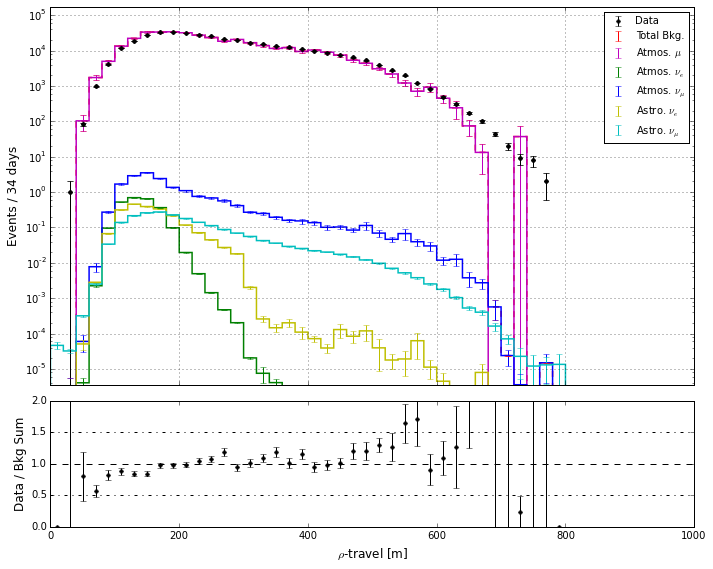

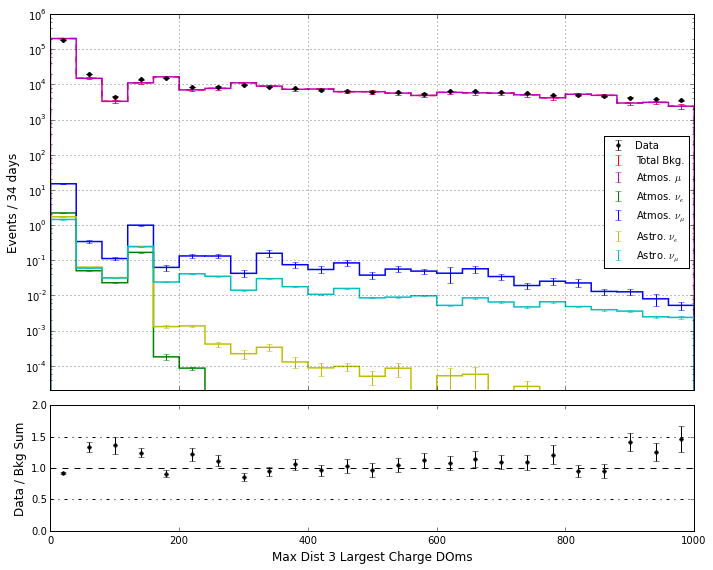

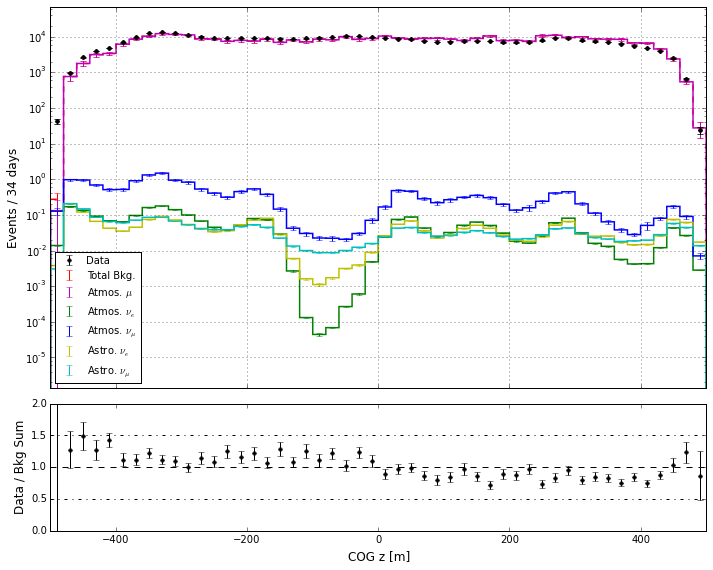

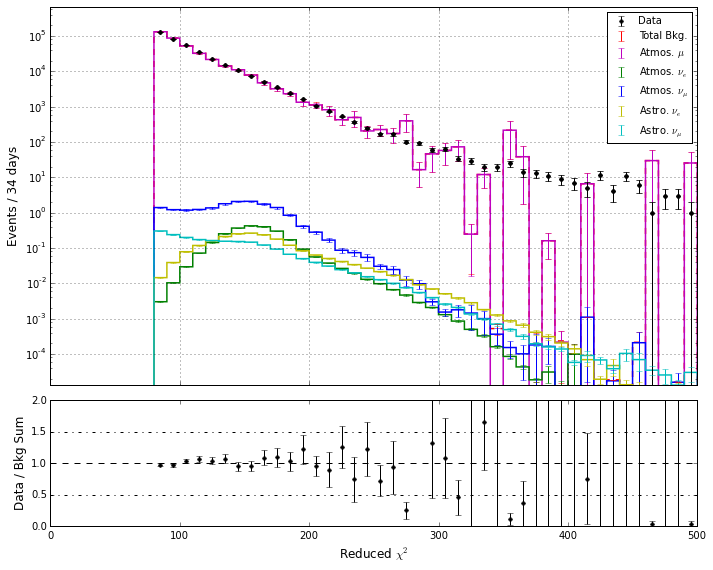

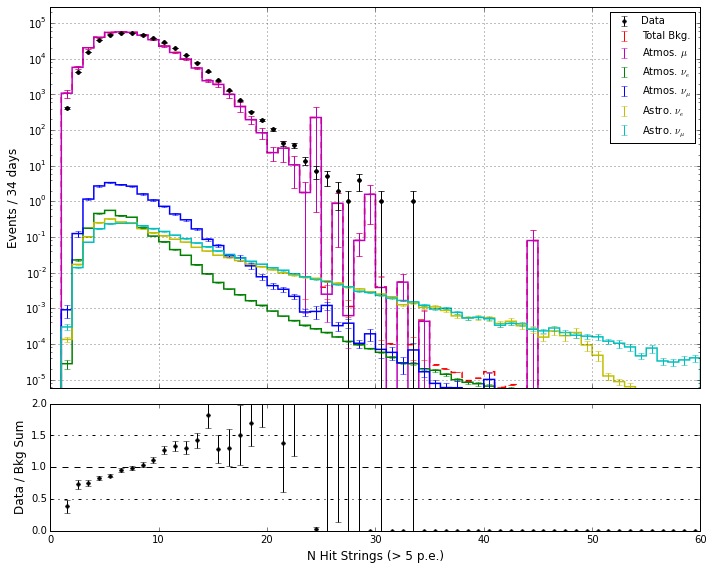

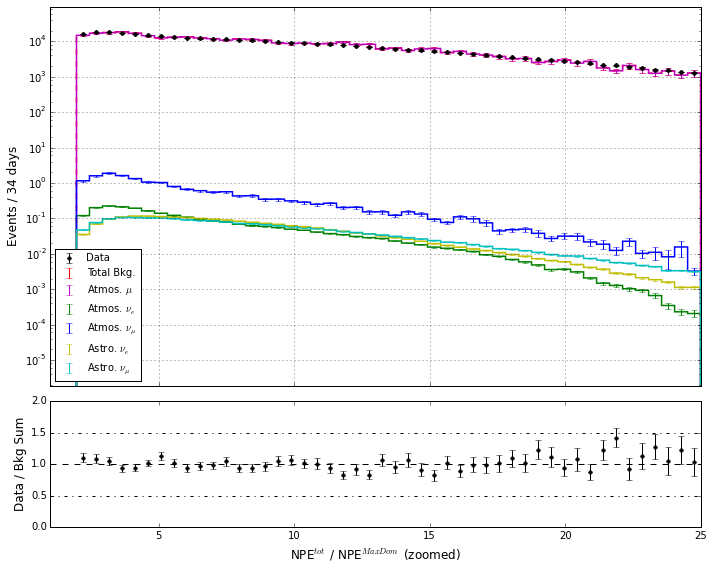

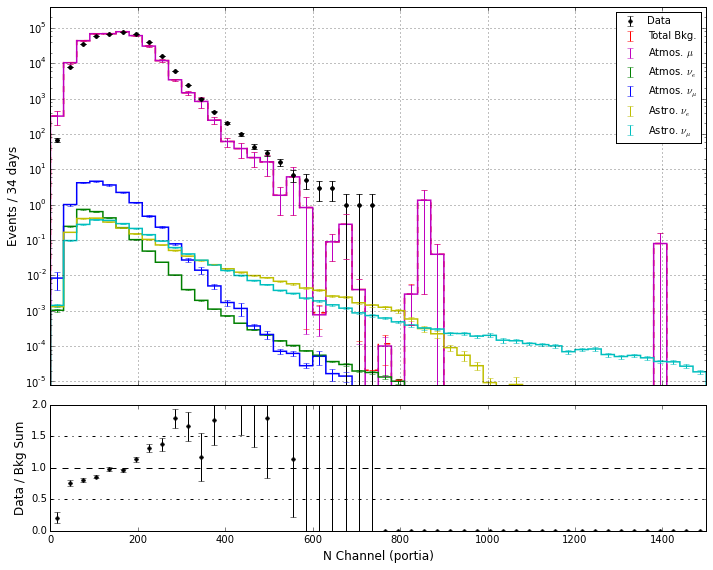

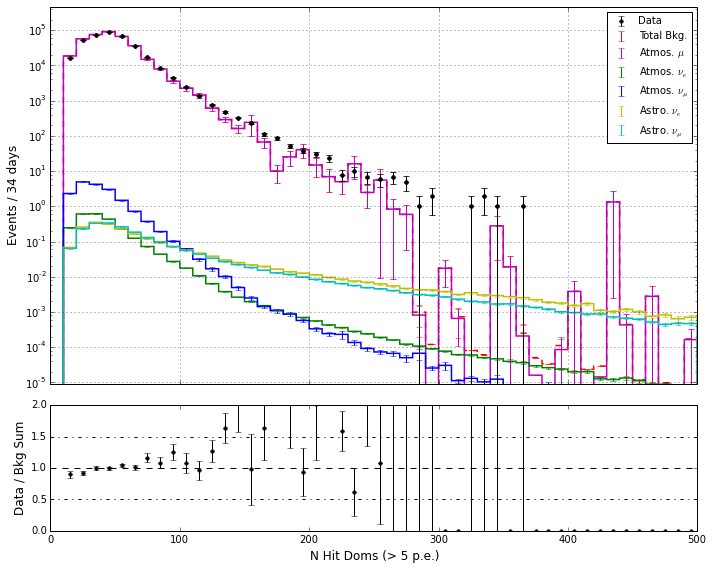

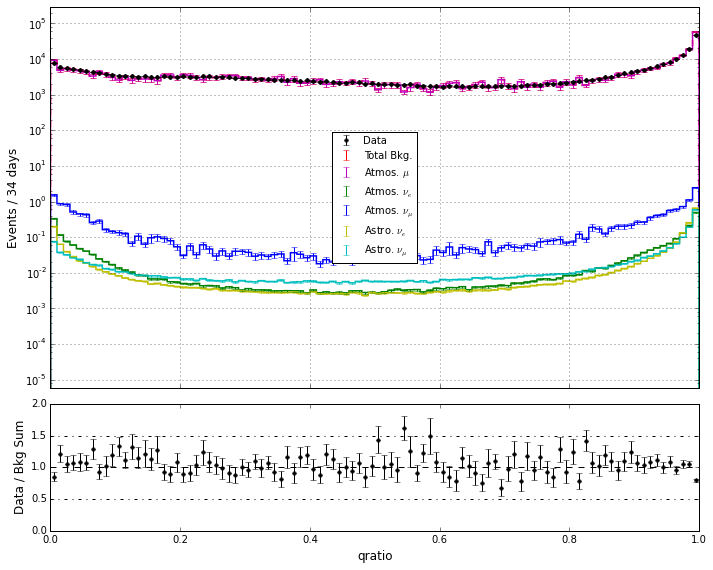

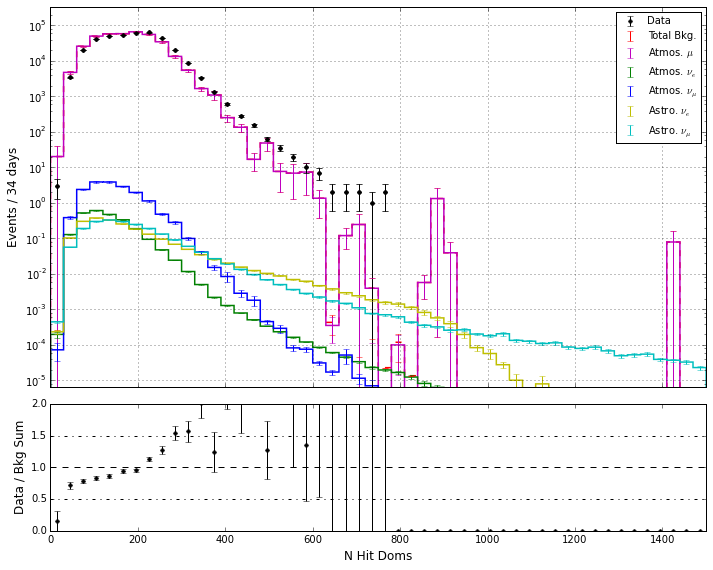

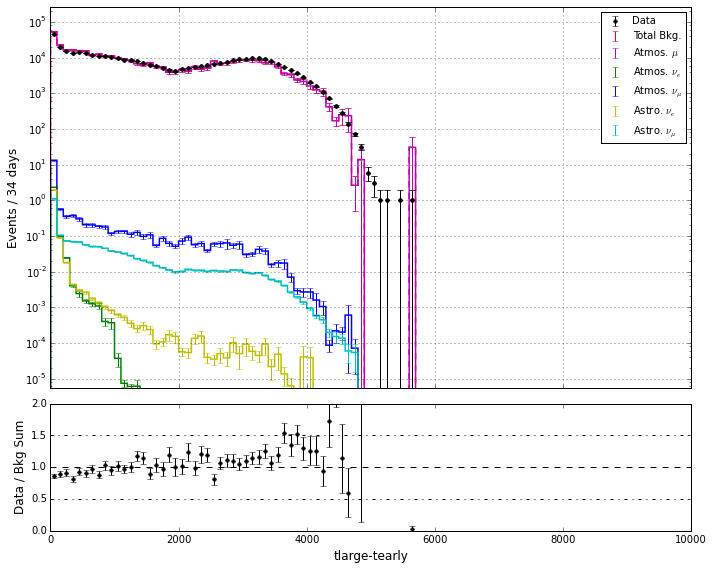

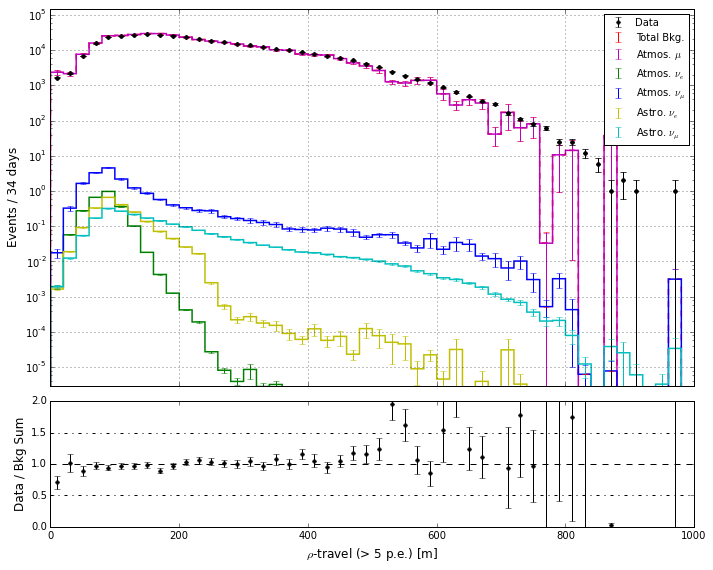

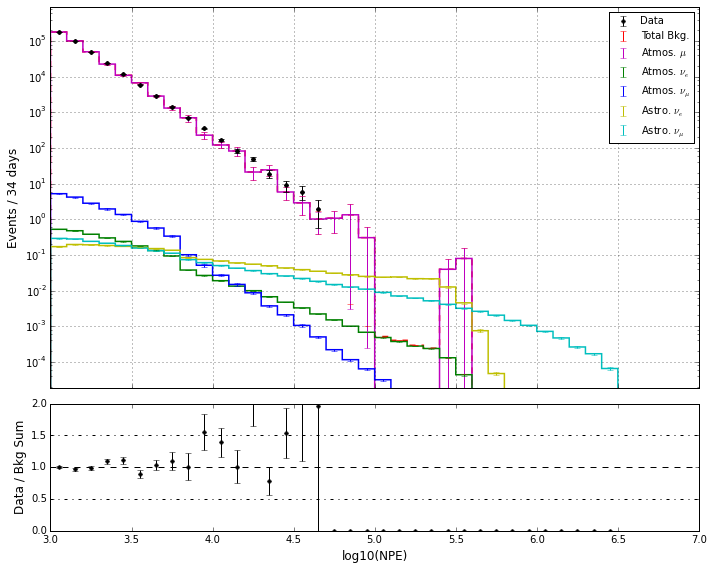

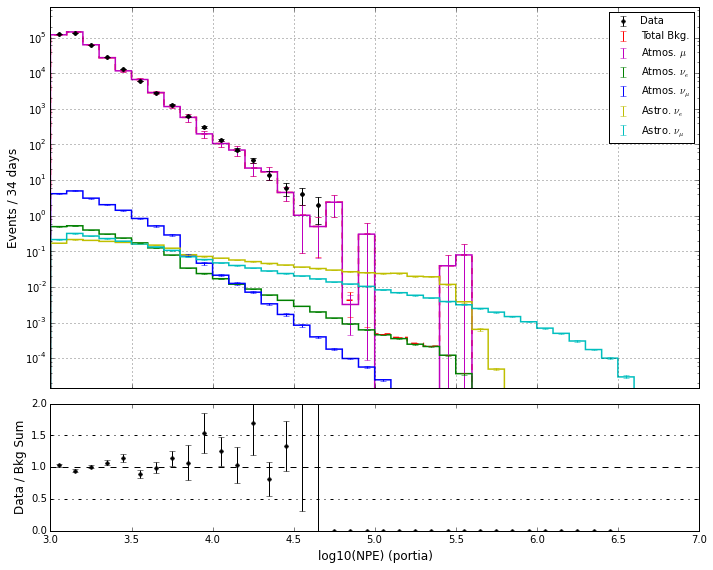

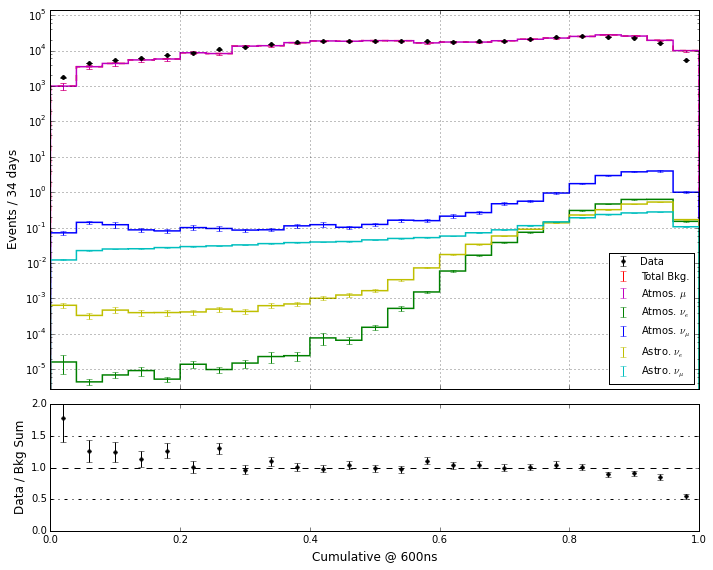

In [10]:
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    
    plt.savefig(savedir+'ballooncut/'+lims[3]+'.png')

In [11]:
# Ok, now let's focus on the outer events.

# Apply qlayerCut
cval = 0.8
dt_data = qlayerCut(dt_data, False, cval)
dt_numu = qlayerCut(dt_numu, False, cval)
dt_nue  = qlayerCut(dt_nue, False, cval)
dt_cor  = qlayerCut(dt_cor, False, cval)
dt_mc   = qlayerCut(dt_mc, False, cval)

info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)


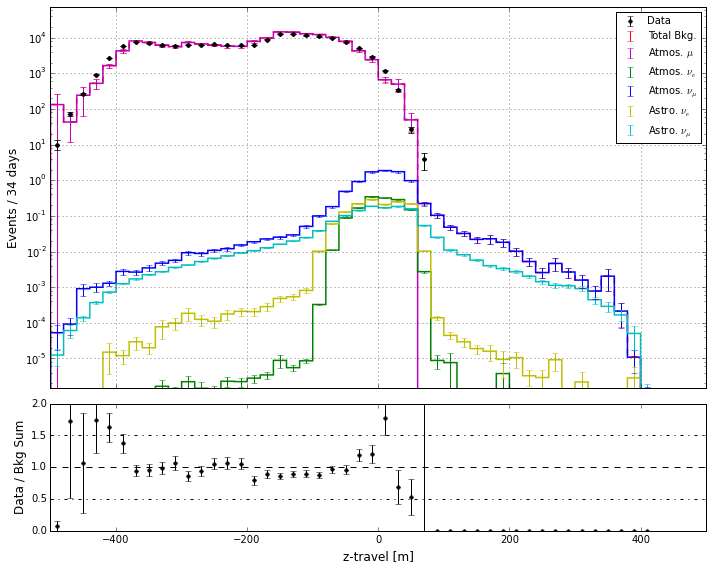

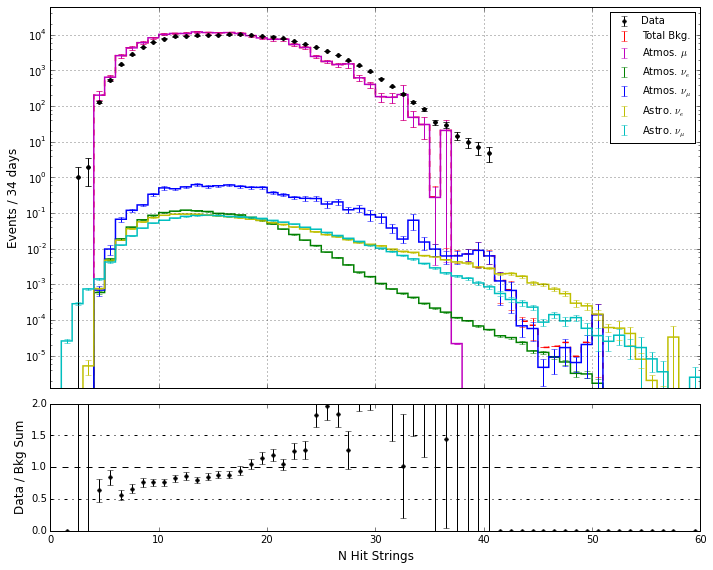

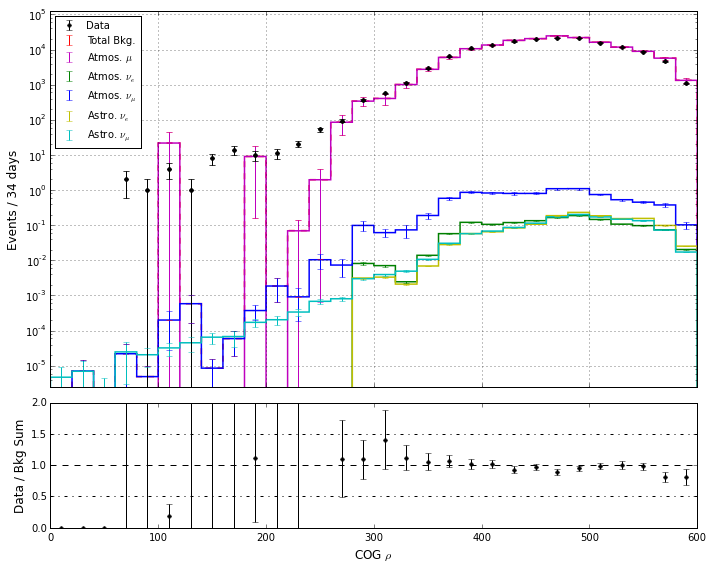

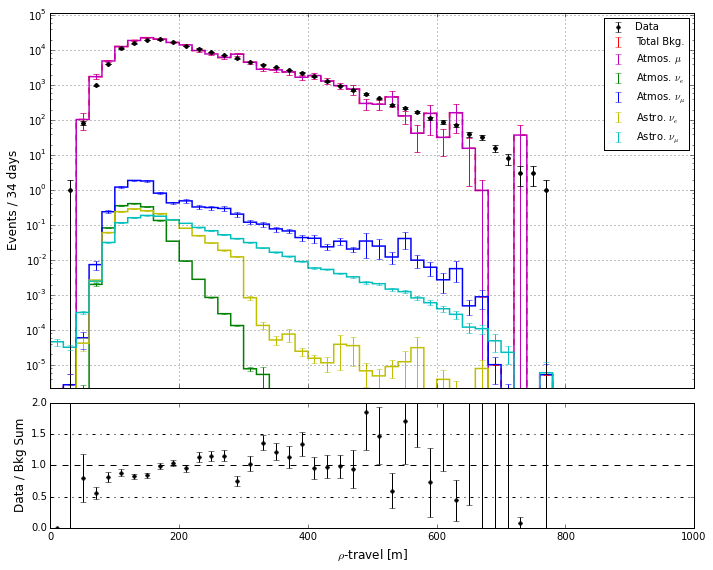

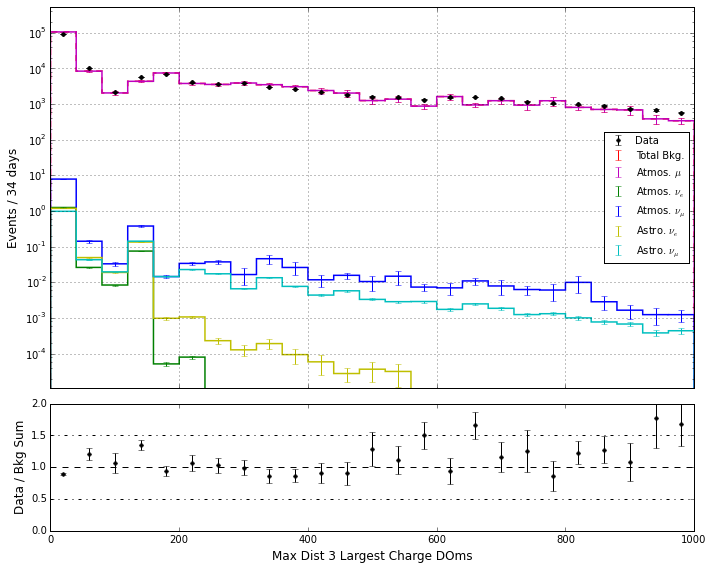

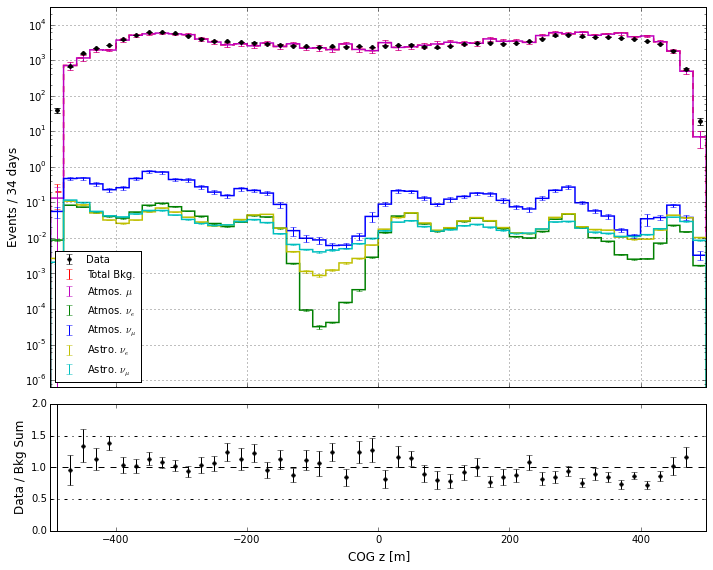

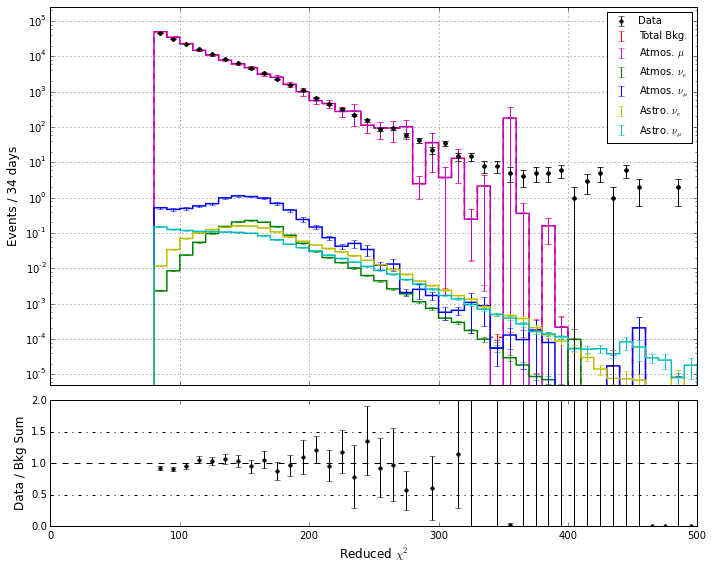

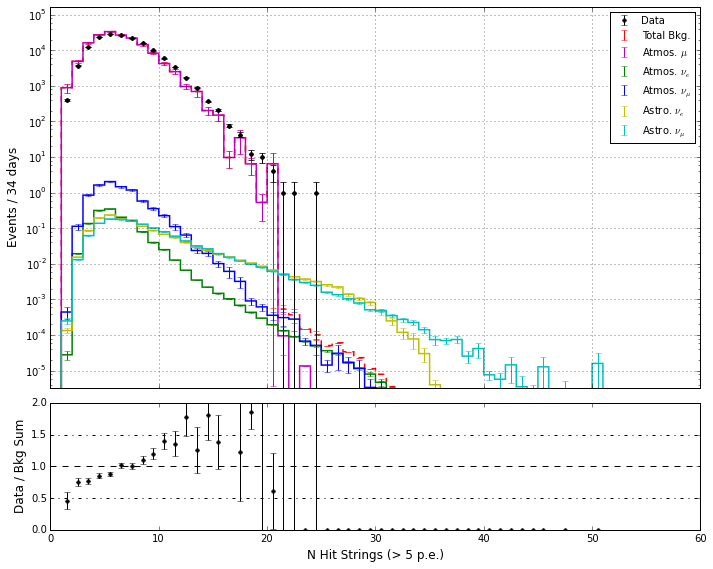

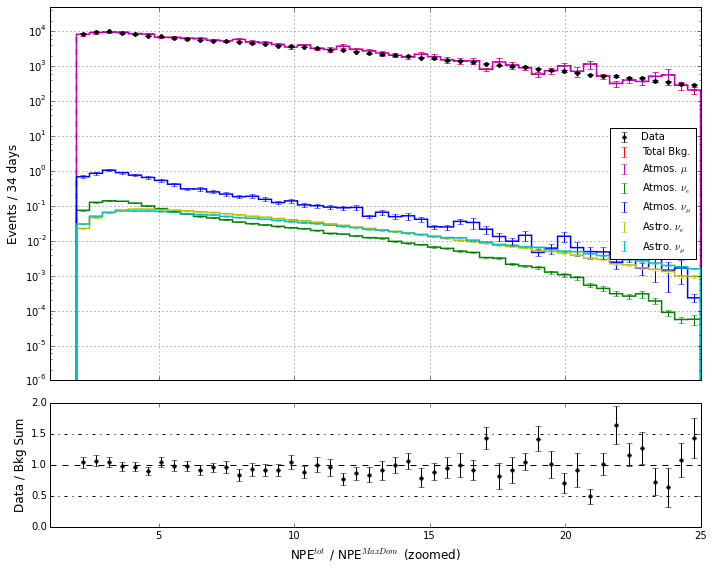

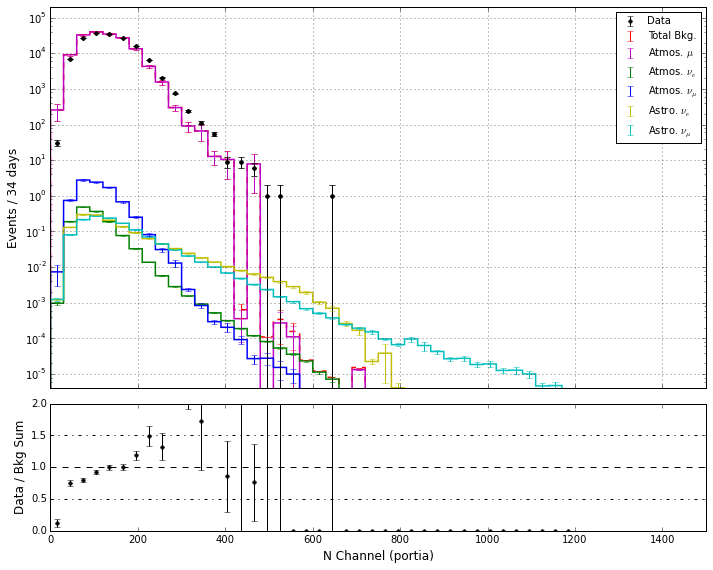

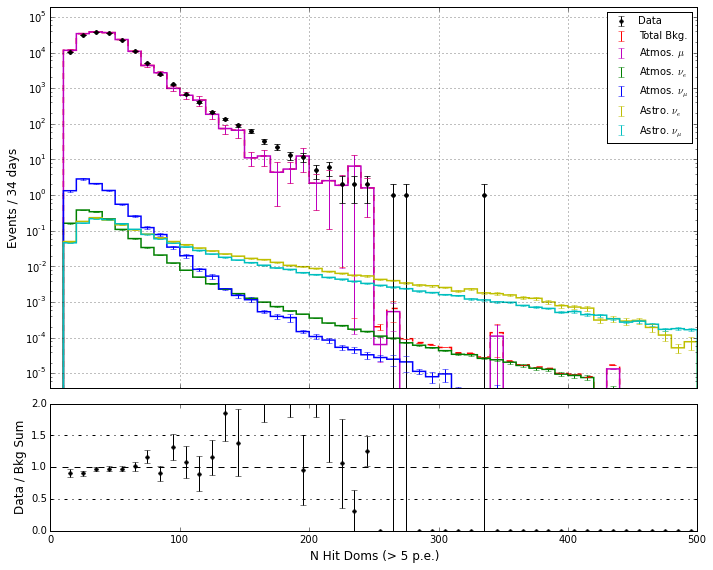

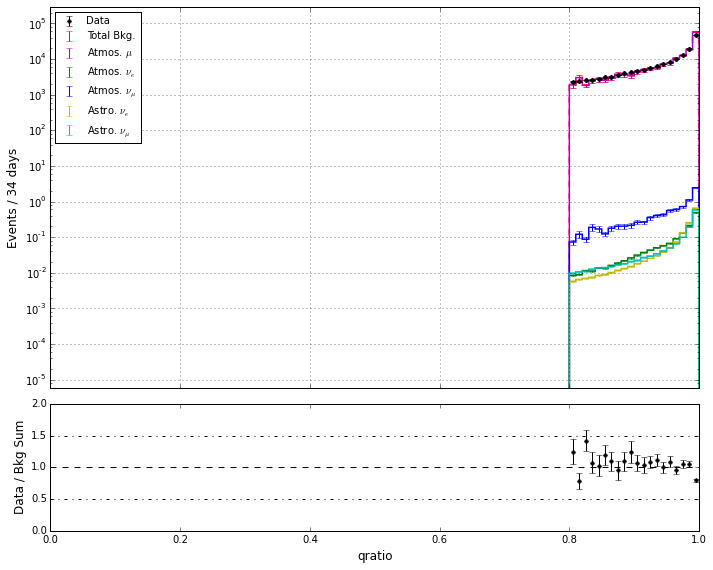

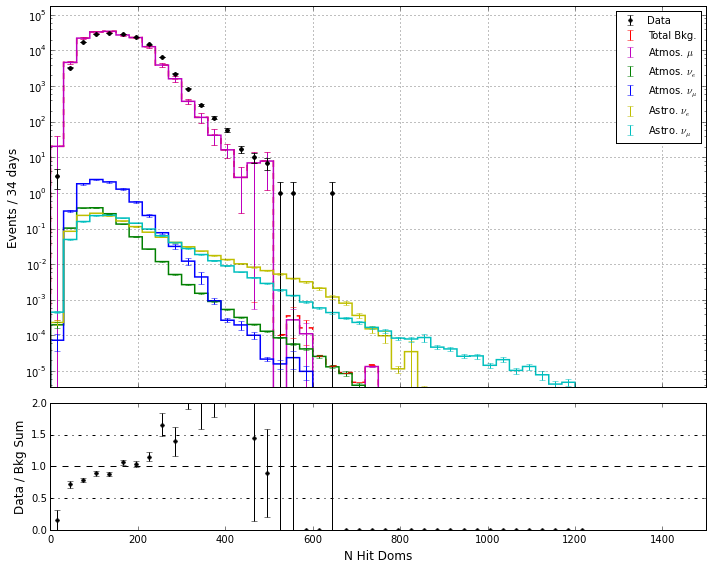

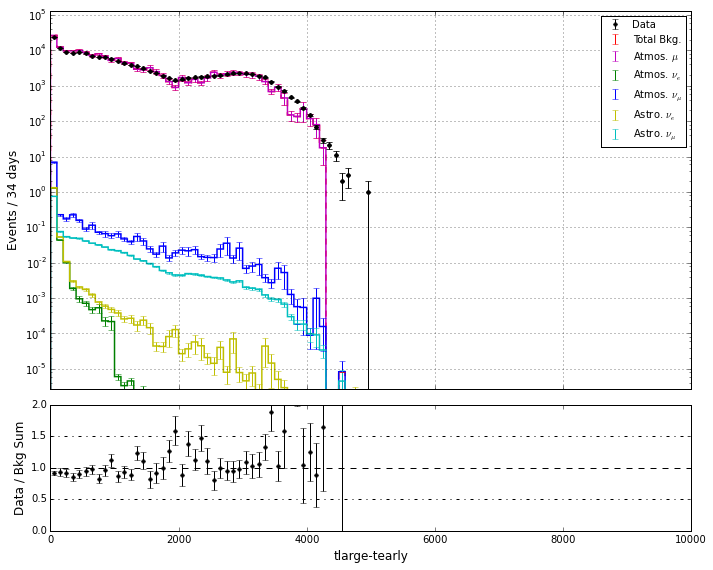

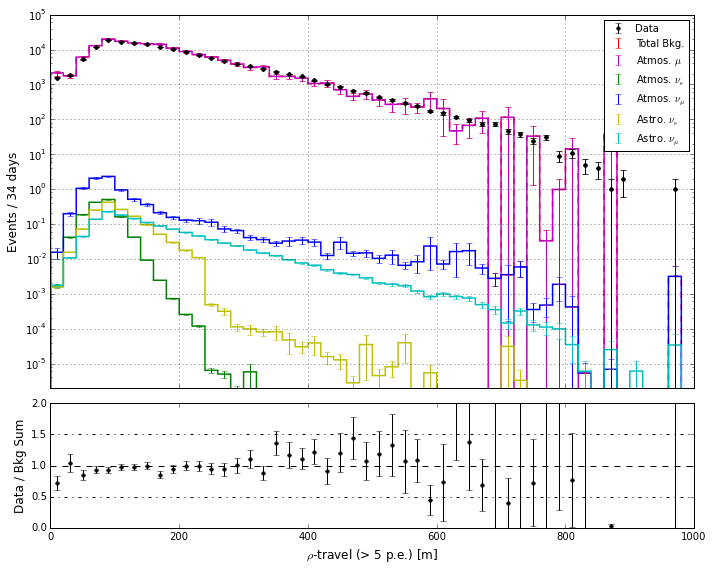

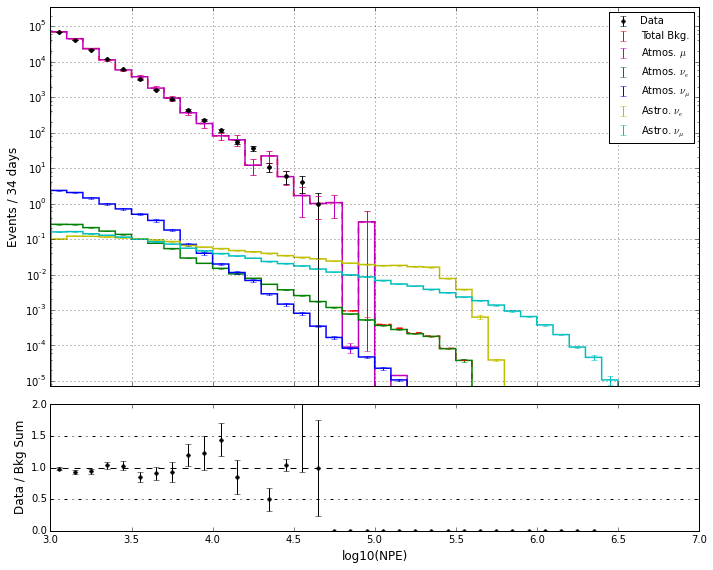

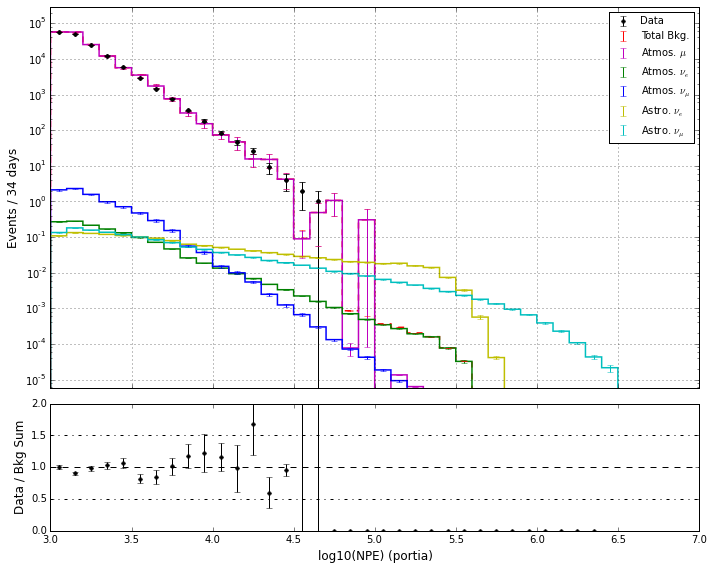

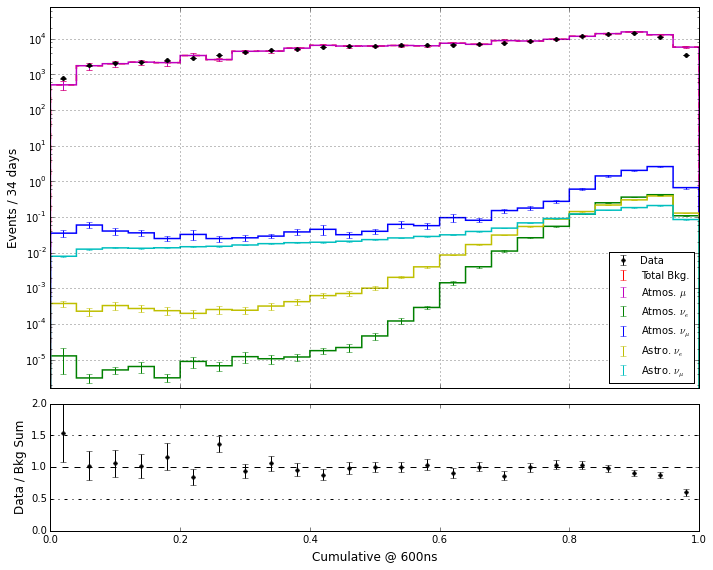

In [12]:
# Check variables again after the cut
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)

    plt.savefig(savedir+'ballooncut_qratiocut/'+lims[3]+'.png')

In [13]:
# Let's cut on tlarge-tearly
def dtcut(dt, cval):
    return dt[ dt['tlarge5[0]-tearly5[0]'] < cval]

# Cut away at 200
cut = 200
dt_data = dtcut(dt_data, cut)
#dt_numu = dtcut(dt_numu, cut)
dt_nue  = dtcut(dt_nue, cut)
dt_cor  = dtcut(dt_cor, cut)
dt_mc   = dtcut(dt_mc, cut)

info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)

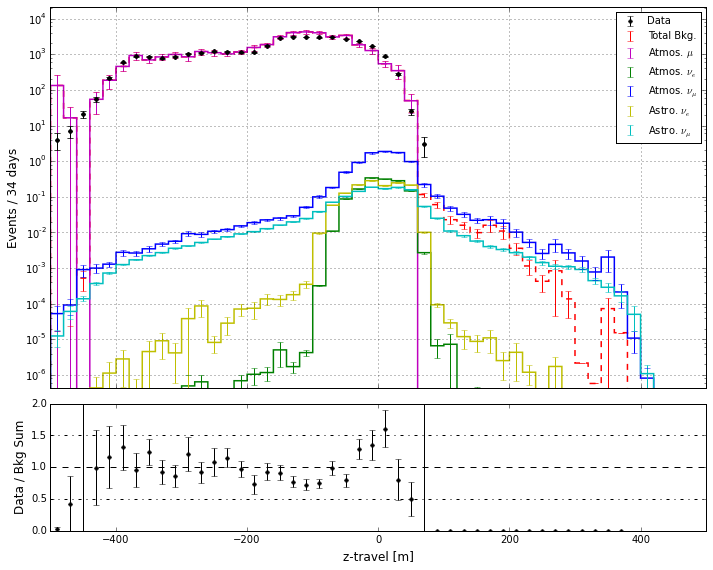

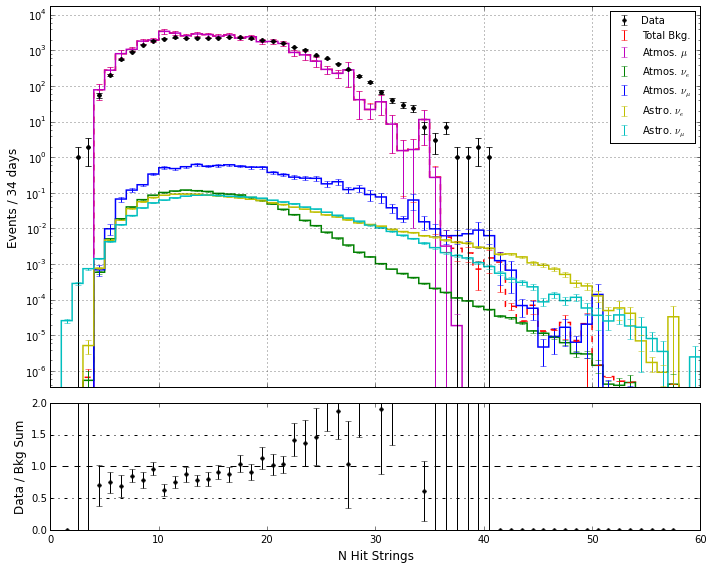

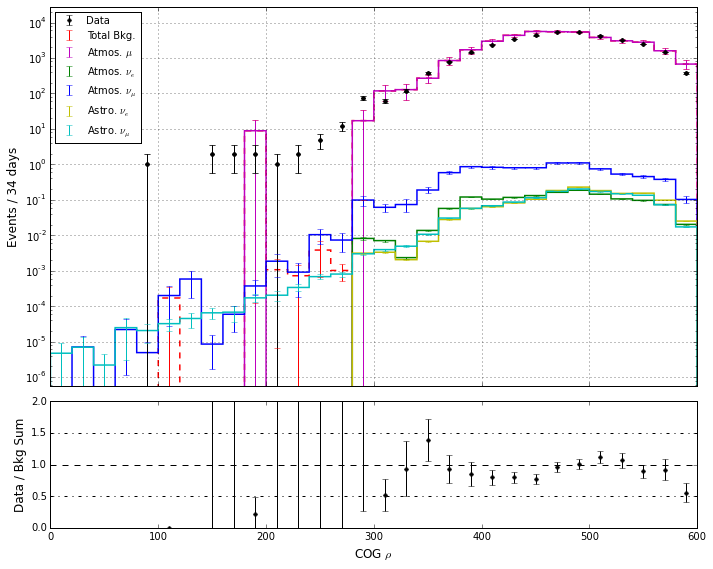

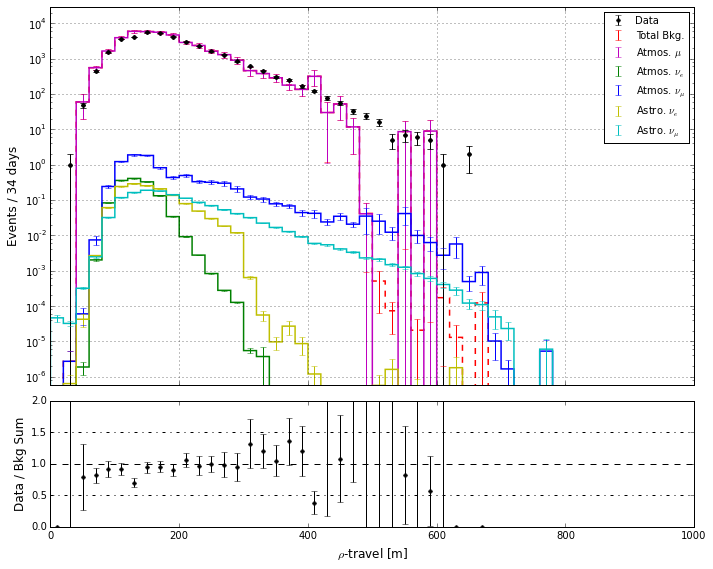

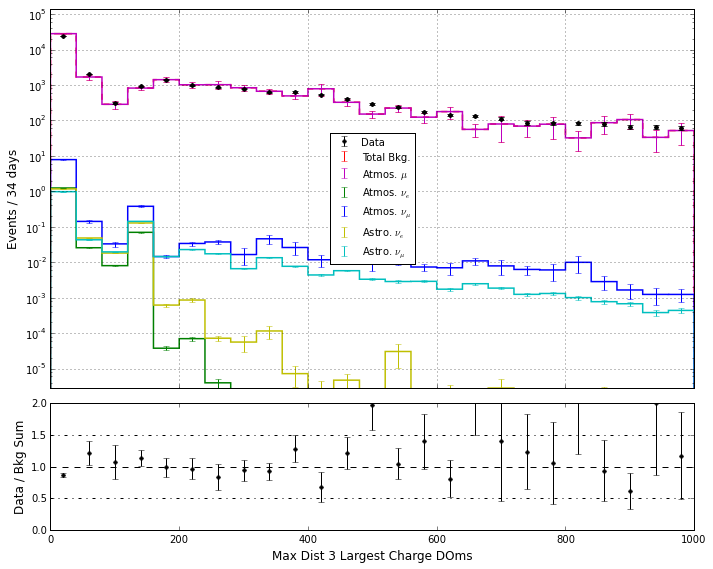

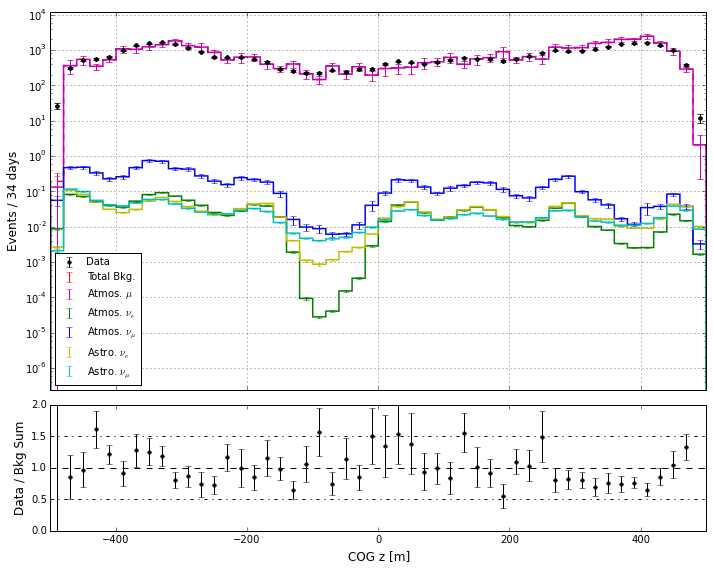

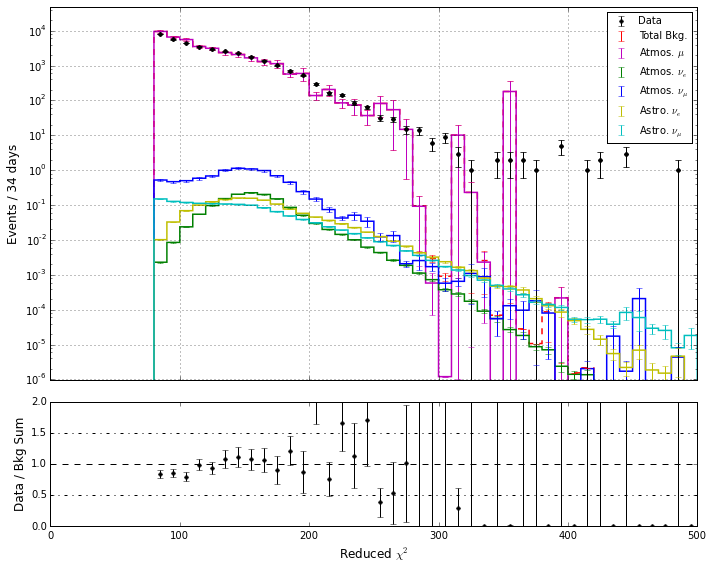

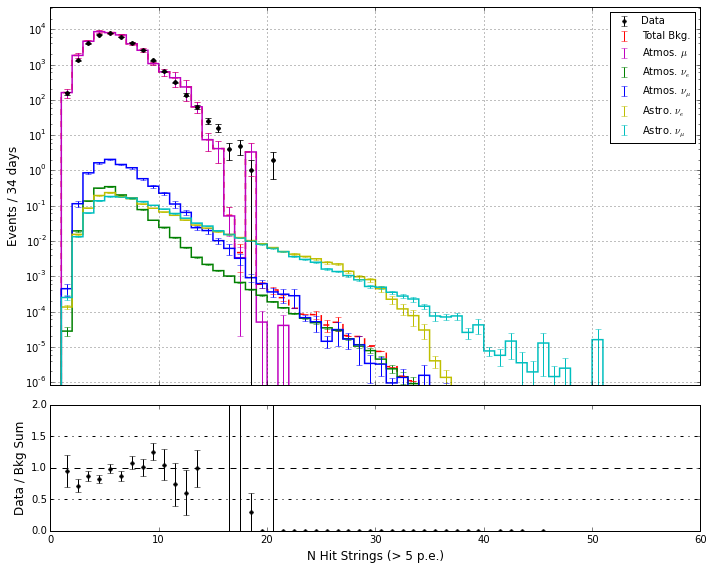

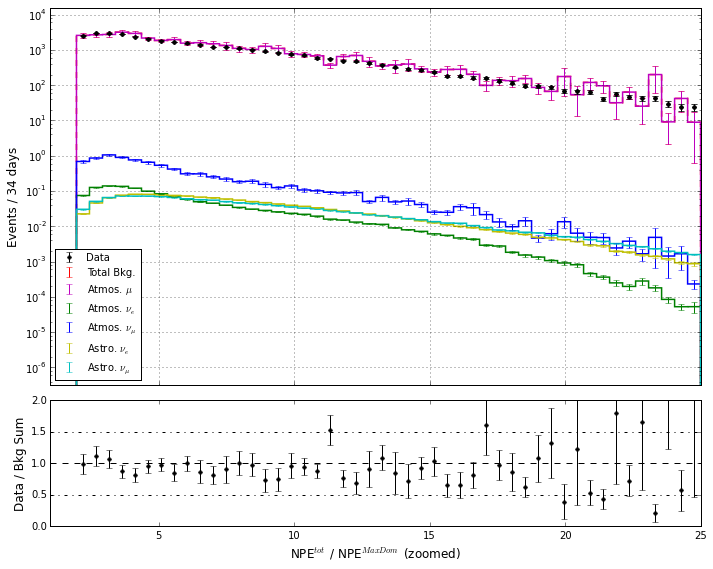

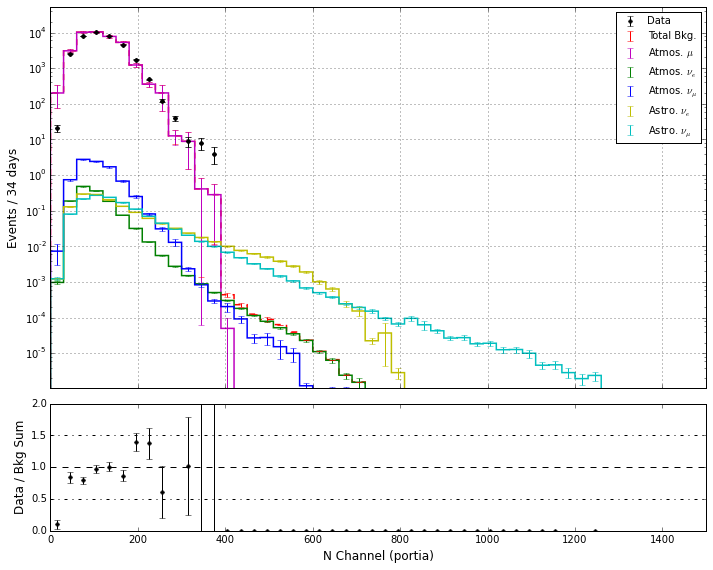

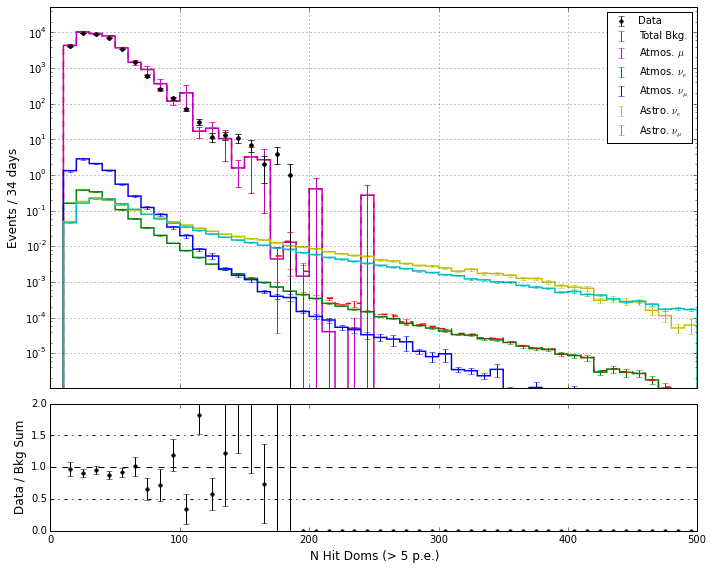

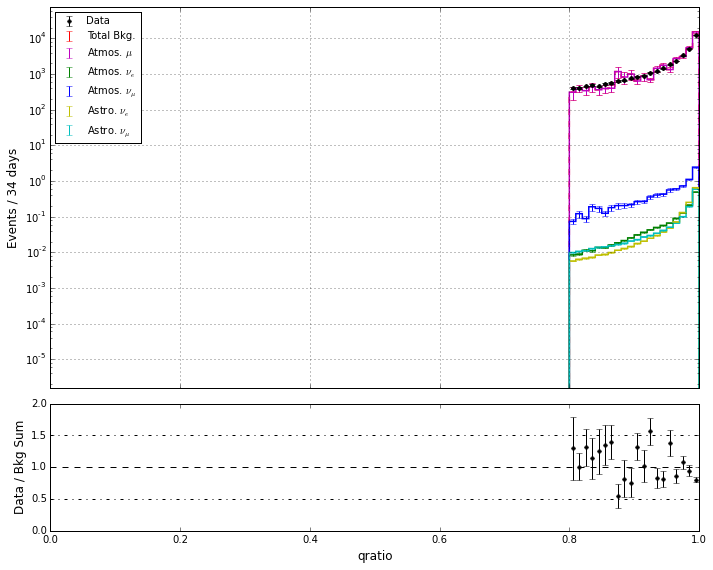

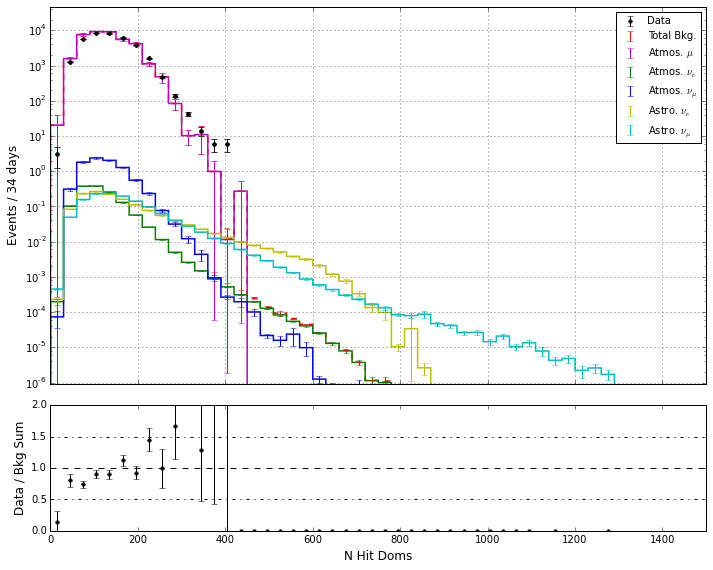

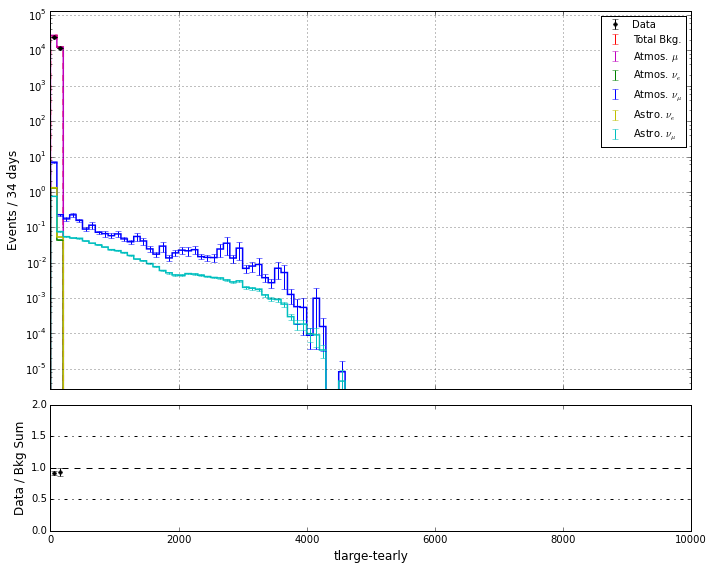

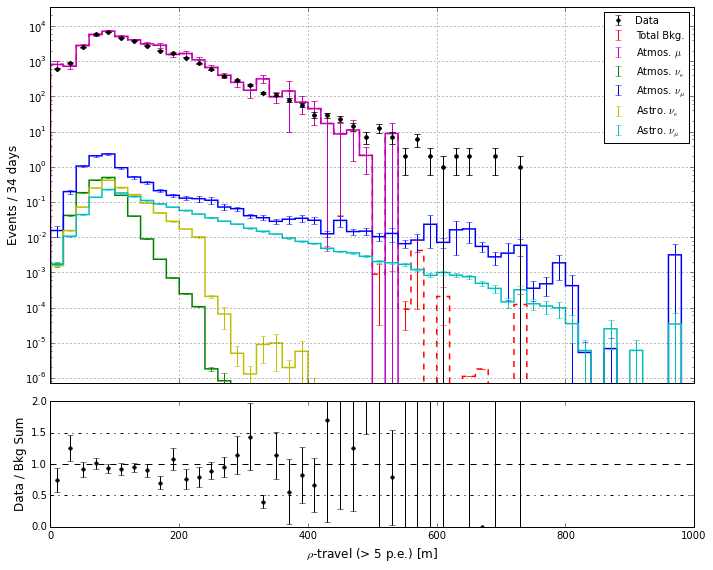

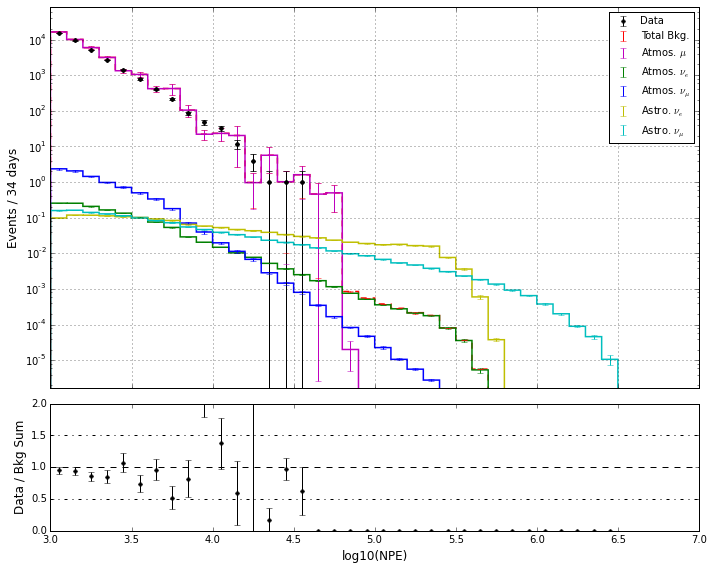

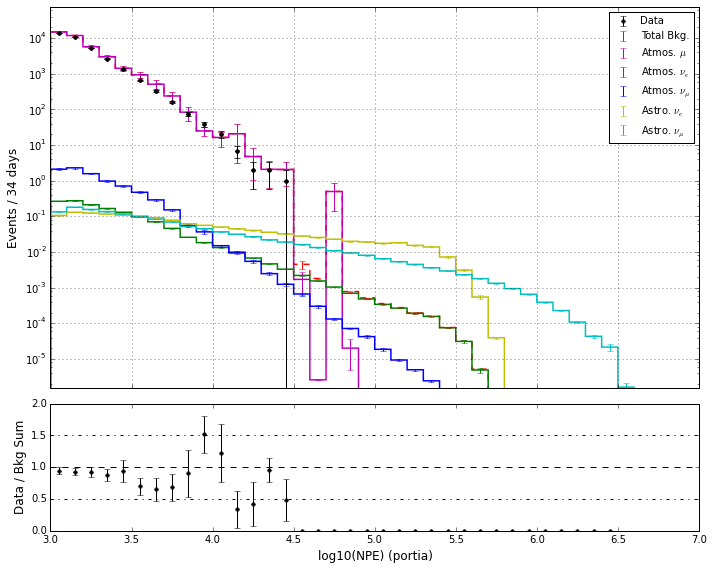

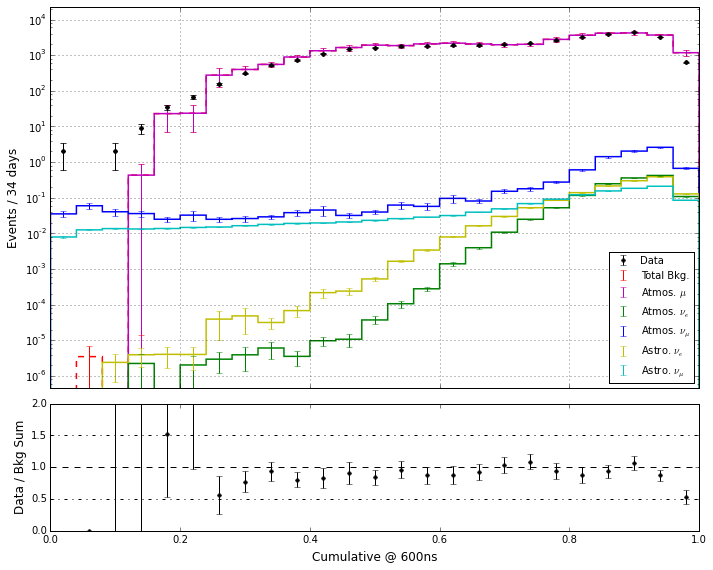

In [15]:
# Remake the plots
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    
    plt.savefig(savedir+'ballooncut_qratiocut_timing/'+lims[3]+'.png')

14.4246962935
3.98958796968
3.66088738447


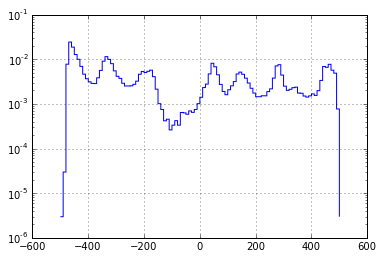

In [32]:
#Check
sf = 365/34.7
temp = dt_nue[ np.log10(dt_nue.PrimaryNeutrinoEnergy) > 6]
print sum(dt_nue.wE2)*sf
print sum(temp.wE2)*sf
print sum(temp[ ((-200 > temp.hs_cogz) | (temp.hs_cogz > 0)) ].wE2)*sf
temp.hs_cogz.hist(range=(-500,500),bins=100,
                  weights=temp.wE2.as_matrix(),log=True,
                 histtype='step')


In [19]:
# Peal some events off for further examination
def peal(var, cut):
    ids = dt_data[ dt_data[var] > cut][['evtid','runid','hs_z_travel']]
    return ids

def writeIDS(var,cut,fname):
    ids = peal(var,cut)
    outfile = open(fname,'w')
    evts = ids['evtid'].as_matrix()
    runs = ids['runid'].as_matrix()
    for i in range(len(runs)):
        outfile.write(str(runs[i])+ " " + str(evts[i]) + "\n")
    outfile.close()

peal('hs_z_travel', 60)
#writeIDS('hm_nhit_doms',370,'dataskim_nhitdoms40.txt')

evtid   runid  hs_z_travel
88405   51699428  120540    61.006822
110017  56239179  120620    61.068001
246871  60987322  121510    73.695087

In [31]:
print len(dt_data), len(dt_cor), len(dt_nue[dt_nue['PrimaryNeutrinoEnergy']>np.power(10,6)])

75838 10339 345892
